In [3]:
!pip install pandas
!pip install plotly

INTRODUCTION:

In the past few years, Major League Baseball has begun to look at more advanced statistics in the game. One of those statistics is exit velocity. Exit velocity measures the speed of the baseball as it comes off the bat, immediately after a batter makes contact. This stat is tracked for every batted ball. Achieving a high exit velocity is one of a hitter’s primary goals. A hard-hit ball may result in an out, but the defense will have less time to react, so the batter’s chance of reaching base will always be higher. The overall problem that I will be looking at are the different comparisons and correlations between certain features of the dataset. Using this dataset I will try and solve problems related to exit velocity. Questions I plan to lean into and answer are something like this; Does a higher average exit velocity lead to a higher or lower launch angle off the bat? Piggybacking off of that question I will look if having a higher launch angle leads to farther home runs.  I plan to also focus primarily on 2021-2022 data and compare those years to see if exit velocity had increased between those years.




INTRODUCING THE DATA:

The dataset that I decided to use comes from the Kaggle website and it contains Major League Baseball batting exit velocity data from 2015–2022. It has around 2,000 rows of data and exactly 20 columns of different features. Some of the more important features that I will be focusing on are the players, average_ev, which is average exit velocity, launch_angle, which is the angle that which the ball comes off the bat, and average_homerun, which is how far the average home run ball is for the players of this dataset. Using this dataset I hope to answer the questions that I asked above.



DATA PREPROCESSING:

I began my data preprocessing by making sure the usability of the dataset I chose was high. I wanted to check the usability of the dataset because if the usability of the dataset is low, then how are you gonna know if you're going to get good and accurate results?   The usability of the dataset I pulled from Kaggle was 9.71/10; so the dataset is very well functional and good to use for the problems that I intend to answer. Next, I wanted to make sure that I was able to pull the CSV file and copy it into my notebook in order to have all the features that the file included. This step is needed to make sure you have the correct data in order to answer your questions. Another step that I chose to take was to look for null values in the dataset. It is important to check for null values because having null values means that your dataset has unknown values and could mix up your potential results. After checking the dataset, I determined that it consisted of nine null values in the average_homerun feature. Then in order to answer the specific questions that I wanted too, I separated the columns that I needed. I felt that this was paramount because having data that you do not need can mess up the results you want to look for. I selected the columns player, year, average_ev, launch_angle, and average_homerun because those were the main features that I plan to focus on. Then I selected the first 480 rows because those consisted of data from the years 2021-2022. I did this because I plan to center all of my visualizations on these years and compare them to see trends in exit velocity.




In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [5]:
exit_velocity = pd.read_csv(r'C:\Users\malmf\AppData\Local\Temp\46afda31-1742-4728-8ca8-546b29f46b95_archive (1).zip.b95\mlb-batter-exit-velocity.csv')
print(exit_velocity)

first_ten_rows = exit_velocity.head(10)

print(first_ten_rows)

        id  rank  year               player  batted_ball_events  launch_angle  \
0        1     1  2022         Judge, Aaron                 341          14.6   
1        2     2  2022      Alvarez, Yordan                 304          12.1   
2        3     3  2022          Trout, Mike                 234          24.7   
3        4     4  2022      Schwarber, Kyle                 312          18.9   
4        5     5  2022   Stanton, Giancarlo                 228          10.2   
...    ...   ...   ...                  ...                 ...           ...   
1978  1979   246  2015         Peña, Brayan                 302           8.0   
1979  1980   247  2015          Reyes, José                 431          13.3   
1980  1981   248  2015         Sogard, Eric                 326          11.6   
1981  1982   249  2015          Revere, Ben                 536           5.1   
1982  1983   250  2015       Iglesias, José                 379           4.5   

      sweet_spot_percentage

In [6]:
exit_velocity.columns

Index(['id', 'rank', 'year', 'player', 'batted_ball_events', 'launch_angle',
       'sweet_spot_percentage', 'max_ev', 'average_ev',
       'fly_ball_line_drive_ev', 'ground_ball_ev', 'max_distance',
       'average_distance', 'average_homerun', 'hard_hit_95mph+',
       'hard_hit_percentage', 'hard_hit_swing_percentage', 'total_barrels',
       'barrels_batted_balls_percentage',
       'barrels_plate_appearance_percentage'],
      dtype='object')

In [7]:
exit_velocity.shape

(1983, 20)

In [8]:
exit_velocity.dtypes

id                                       int64
rank                                     int64
year                                     int64
player                                  object
batted_ball_events                       int64
launch_angle                           float64
sweet_spot_percentage                  float64
max_ev                                 float64
average_ev                             float64
fly_ball_line_drive_ev                 float64
ground_ball_ev                         float64
max_distance                             int64
average_distance                         int64
average_homerun                        float64
hard_hit_95mph+                          int64
hard_hit_percentage                    float64
hard_hit_swing_percentage              float64
total_barrels                            int64
barrels_batted_balls_percentage        float64
barrels_plate_appearance_percentage    float64
dtype: object

In [9]:
exit_velocity.index

RangeIndex(start=0, stop=1983, step=1)

In [10]:
exit_velocity.describe()

,id,rank,year,batted_ball_events,launch_angle,sweet_spot_percentage,max_ev,average_ev,fly_ball_line_drive_ev,ground_ball_ev,max_distance,average_distance,average_homerun,hard_hit_95mph+,hard_hit_percentage,hard_hit_swing_percentage,total_barrels,barrels_batted_balls_percentage,barrels_plate_appearance_percentage
count,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1974.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000
mean,992.000000,124.553202,2018.486132,328.671205,12.528190,33.594302,110.762279,88.772718,92.812204,85.858144,435.997983,171.409985,398.273556,122.258195,37.570298,14.143822,23.921836,7.521432,5.020524
std,572.587111,71.769371,2.283553,113.354644,4.564065,4.086816,3.197814,2.197135,2.614001,2.624503,19.849967,19.957949,10.843687,48.333634,7.899738,2.929498,14.964858,4.153573,2.494225
min,1.000000,1.000000,2015.000000,67.000000,-7.900000,18.500000,98.500000,78.200000,83.000000,71.200000,359.000000,98.000000,342.000000,6.000000,6.400000,2.300000,0.000000,0.000000,0.000000
25%,496.500000,62.500000,2017.000000,256.000000,9.500000,30.900000,108.600000,87.350000,91.200000,84.100000,423.000000,158.000000,392.000000,87.500000,32.800000,12.300000,12.000000,4.500000,3.200000
50%,992.000000,124.000000,2018.000000,333.000000,12.500000,33.500000,110.600000,88.800000,92.900000,85.900000,436.000000,172.000000,399.000000,120.000000,38.200000,14.200000,21.000000,7.100000,4.900000
75%,1487.500000,186.000000,2020.000000,415.000000,15.550000,36.300000,112.900000,90.100000,94.500000,87.600000,449.000000,186.000000,406.000000,157.000000,42.700000,16.000000,33.000000,10.150000,6.700000
max,1983.000000,257.000000,2022.000000,599.000000,26.800000,49.700000,122.200000,96.000000,101.300000,94.100000,505.000000,234.000000,438.000000,274.000000,62.200000,23.900000,91.000000,26.700000,15.800000


In [11]:
null_values = exit_velocity.isnull()

# To get a count of null values in each column
null_count = exit_velocity.isnull().sum()

print(null_count)

id                                     0
rank                                   0
year                                   0
player                                 0
batted_ball_events                     0
launch_angle                           0
sweet_spot_percentage                  0
max_ev                                 0
average_ev                             0
fly_ball_line_drive_ev                 0
ground_ball_ev                         0
max_distance                           0
average_distance                       0
average_homerun                        9
hard_hit_95mph+                        0
hard_hit_percentage                    0
hard_hit_swing_percentage              0
total_barrels                          0
barrels_batted_balls_percentage        0
barrels_plate_appearance_percentage    0
dtype: int64


In [12]:
df = exit_velocity[['player',  'year', 'launch_angle', 'average_ev', 'average_homerun']]
print(df)



                   player  year  launch_angle  average_ev  average_homerun
0            Judge, Aaron  2022          14.6        95.8            413.0
1         Alvarez, Yordan  2022          12.1        95.5            403.0
2             Trout, Mike  2022          24.7        91.7            407.0
3         Schwarber, Kyle  2022          18.9        93.3            415.0
4      Stanton, Giancarlo  2022          10.2        94.6            400.0
...                   ...   ...           ...         ...              ...
1978         Peña, Brayan  2015           8.0        85.6              NaN
1979          Reyes, José  2015          13.3        84.6            386.0
1980         Sogard, Eric  2015          11.6        85.5            410.0
1981          Revere, Ben  2015           5.1        83.1            367.0
1982       Iglesias, José  2015           4.5        83.7            366.0

[1983 rows x 5 columns]


In [13]:
first_hundred_rows = df.head(480)

print(first_hundred_rows)

                  player  year  launch_angle  average_ev  average_homerun
0           Judge, Aaron  2022          14.6        95.8            413.0
1        Alvarez, Yordan  2022          12.1        95.5            403.0
2            Trout, Mike  2022          24.7        91.7            407.0
3        Schwarber, Kyle  2022          18.9        93.3            415.0
4     Stanton, Giancarlo  2022          10.2        94.6            400.0
..                   ...   ...           ...         ...              ...
475           Kemp, Tony  2021          18.4        86.7            359.0
476         Lopez, Nicky  2021           2.8        86.8            382.0
477   Simmons, Andrelton  2021           3.9        84.1            389.0
478     Torreyes, Ronald  2021          12.2        82.2            375.0
479      Fletcher, David  2021           8.2        82.3            369.0

[480 rows x 5 columns]


In [14]:
df_filtered = df[df['year'].isin([2021, 2022])]


print(df_filtered.columns)


fig = px.scatter(
    df_filtered,
    x='average_ev',
    y='average_homerun',
    color='year',  
    hover_data={
        'player': True,           
        'year': True,             
        'launch_angle': True,     
        'average_ev': True,       
        'average_homerun': True   
    }
)


fig.update_layout(
    title='Interactive Scatter Plot (2021 and 2022)',
    xaxis_title='Average Exit Velocity (MPH)',
    yaxis_title='Average Home Run (Feet)'
)


fig.show()

Index(['player', 'year', 'launch_angle', 'average_ev', 'average_homerun'], dtype='object')


The first visualization that I would like to talk about is an interactive scatter plot. This scatter plot shows data from the 2021 and 2022 season. All the data from the 2021 season is blue, and all of the 2022 data is yellow. Since the graph is interactive, you can hover over any one of the data points and it will tell you who the player was, what year it was, what the average exit velocity was, what the average home run distance was, and what the launch angle had been when the baseball was hit. Key data points that I would like to focus on are which player had the highest average exit velocity, which player had the farhest average home run, and how those compared to the yearly average out of all the other data points. The player that had the highest average exit velocity in 2021 and actually also in 2022 was Aaron Judge. His average exit velocity in 2021 and 2022 was 95.8 Mph, which led the league in both years. The yearly average for 2021 was 89.23 Mph. This means that he had and average exit velocity of 6.57 Mph over the league average and in 2022 the league average was 89 Mph, so he was almost 7 Mph above the league avearge in that year. Then looking at the average home run distance we see that Bradley Zimmerman led the league in 2021 with an average distance of 438 feet. This more than likely means he hit only a few home runs and when he did hit home runs, he crushed the ball because an average homerun distance of 438 feet is ridiculous. Supporting that, the average home run distnace in 2021 was around 400 feet. Then if we look at 2022, Ronald Acuna Jr. had the highest average home run distance of 437 feet. 437 feet is also ridiculous because he hit 15 home runs that year. That shows how powerful a player like Ronald Acuna Jr. is. These features are just some of the few in this dataset, but they the important ones when looking at possible awards and contract negotiations. The next models will focus on average exit velocity, average home run distance, and launch angle and how they correlate.

In [15]:
data_2021 = df[df['year'] == 2021]
data_2022 = df[df['year'] == 2022]

# Calculate means for each year
mean_2021 = data_2021[['launch_angle', 'average_ev', 'average_homerun']].mean()
mean_2022 = data_2022[['launch_angle', 'average_ev', 'average_homerun']].mean()

print(mean_2021)
print(mean_2022)

difference = mean_2022 - mean_2021

print(difference)



launch_angle        12.971552
average_ev          89.239224
average_homerun    399.616379
dtype: float64
launch_angle        12.816532
average_ev          88.990726
average_homerun    397.178862
dtype: float64
launch_angle      -0.155019
average_ev        -0.248498
average_homerun   -2.437518
dtype: float64


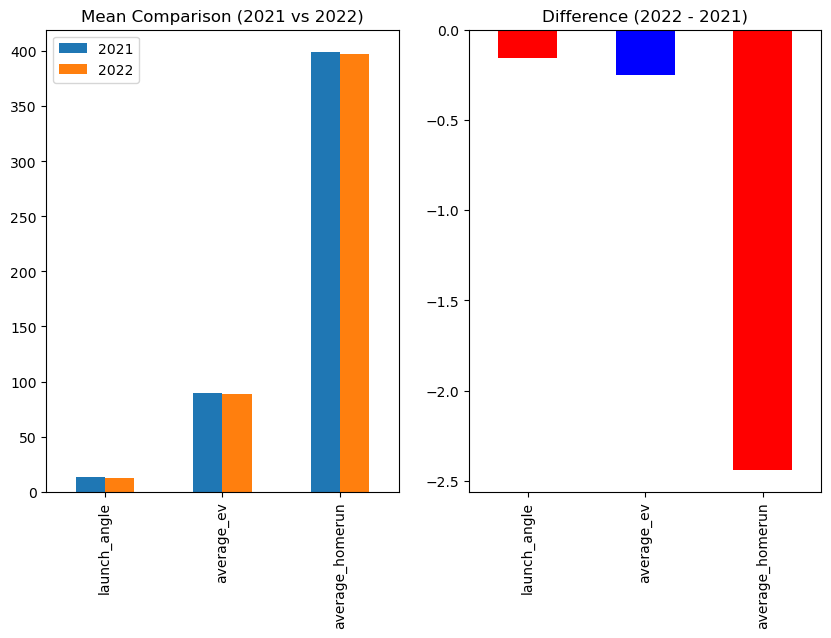

In [16]:
plt.figure(figsize=(10, 6))

# Bar plot for means
plt.subplot(1, 2, 1)
mean_comparison = pd.DataFrame({'2021': mean_2021, '2022': mean_2022})
mean_comparison.plot(kind='bar', ax=plt.gca())
plt.title('Mean Comparison (2021 vs 2022)')

# Bar plot for differences
plt.subplot(1, 2, 2)
difference.plot(kind='bar', ax=plt.gca(), color=['red', 'blue'])
plt.title('Difference (2022 - 2021)')


plt.show()

The first model that I created compares the mean values for launch angle, average exit velocity, and average home run distance along with the differences between them from the years 2021-2022. Starting with the graph on the left. The graph on the left shows the mean comparisons of the features I focused on. The average launch angle for the 2021 MLB season was 12.97 degrees and in 2022 it was 12.82 degrees. This shows that the average launch angle decreased by .15 from 2021-2022. Now to look at the average exit velocity. In 2021 the average exit velocity was 89.24 MPH and in 2022 the average was 89 MPH. This shows that there was another decrease in statistical analysis. The average exit velocity decreased by .24 MPH from 2021-2022, which is very little but can still be significant when looking at if a player hits the ball hard enough. The last thing these models show is the average home run distance and their difference. The model shows that in 2021 the average home run distance was around 399.62 feet and in 2022 it was around 397.18 feet. This is where I see the largest difference with around 2.44 feet between 2021-2022. These models primarily show that on average a MLB player hit the ball higher, harder, and farther in the 2021 season than the 2022 baseball season.



In [17]:
data = exit_velocity[['launch_angle', 'average_ev']].iloc[:480]

# Check for missing values and clean if necessary
data = exit_velocity.dropna() 



In [18]:
correlation = data['average_ev'].corr(data['launch_angle'])
print(f'Pearson correlation coefficient: {correlation:.2f}')



Pearson correlation coefficient: 0.10


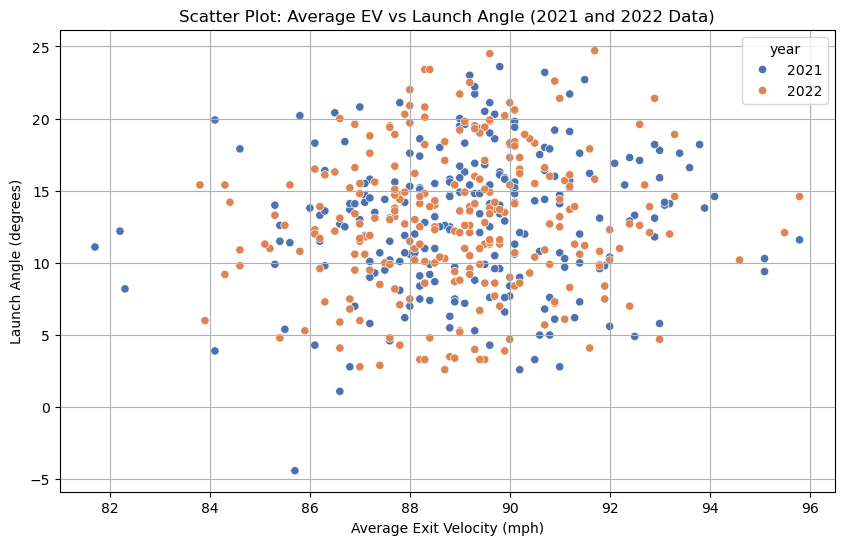

In [26]:
combined_data = pd.concat([data_2021, data_2022])

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_ev', y='launch_angle', hue='year', data=combined_data, palette='deep')

# Add labels and title
plt.xlabel('Average Exit Velocity (mph)')
plt.ylabel('Launch Angle (degrees)')
plt.title('Scatter Plot: Average EV vs Launch Angle (2021 and 2022 Data)')
plt.grid(True)

# Show the plot
plt.show()



In this model I wanted to focus on the correlation between average exit velocity and average launch angle. Still only using data from the 2021 and 2022 season I found that average exit velocity and average launch angle have a very weak positive correlation.The correlation coefficient for this model was .10, SO this means that if the average exit velocity increases, the launch angle increases. This model displays that most of the data falls between 86 Mph and 92 Mph for average exit velocity and between 5 and 20 degrees for launch angle. Overall, looking at this shows that hitting the ball harder will lead to a higher angle of the ball coming off of the bat.


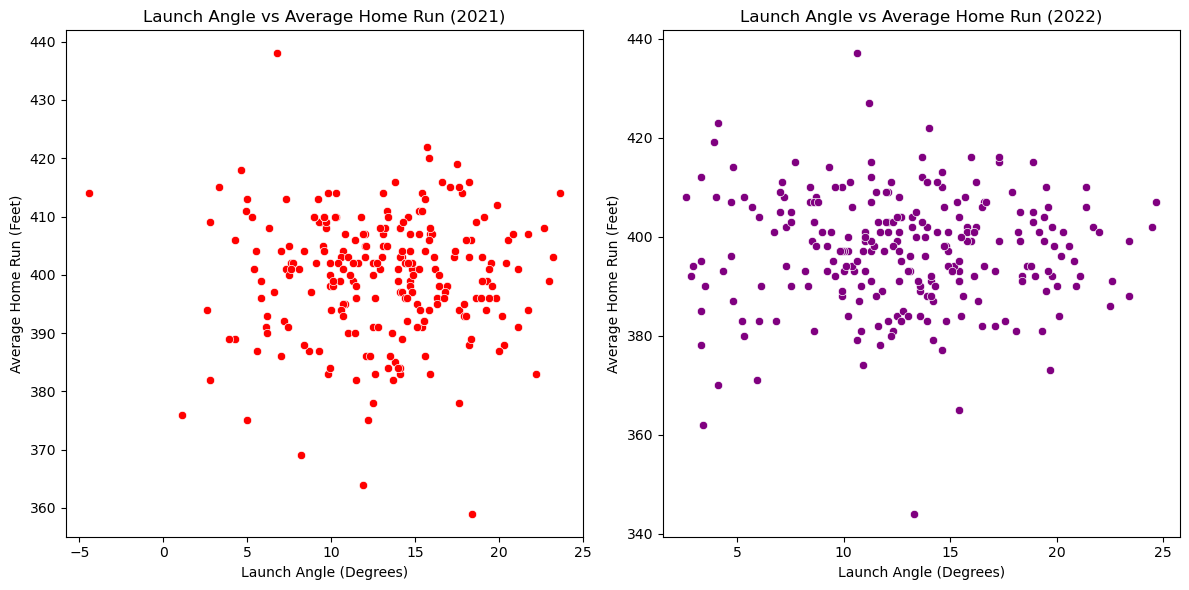

In [187]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=data_2021['launch_angle'], y=data_2021['average_homerun'], color = 'red')
plt.title('Launch Angle vs Average Home Run (2021)')
plt.xlabel('Launch Angle (Degrees)')
plt.ylabel('Average Home Run (Feet)')

# Scatter plot for 2022
plt.subplot(1, 2, 2)
sns.scatterplot(x=data_2022['launch_angle'], y=data_2022['average_homerun'], color = 'purple')
plt.title('Launch Angle vs Average Home Run (2022)')
plt.xlabel('Launch Angle (Degrees)')
plt.ylabel('Average Home Run (Feet)')

plt.tight_layout()
plt.show()


The next model I created focuses on the same 2021 and 2022 data points but it splits the years up into separate scatterplots. These two scatterplots show the correlation between launch angle and the average distance of home runs. First looking at the 2021 model. Most of the data points lie between 5 and 20 degrees for launch angle and between 380 and 420 feet for the average home run distance. The 2021 model seems to show a slight positive correlation between these features as we see more of an incline type shape of the data points appear. This supports that if you see a higher launch angle off of the bat, the further the homer run was during the 2021 season. Now looking at the 2022 model, we see a lesser correlation. Most of the data lies between 5 and 25 degerees for launch angle and 380 and 400 feet for average home run distance. Looking at the 2022 model we see more of a straighter line shape made by the data points thus proving are argument that there is a weak correlation between these features. In the 2022 season the baseball came off of the bat at a lower angle, and lead to shorter home run distances.

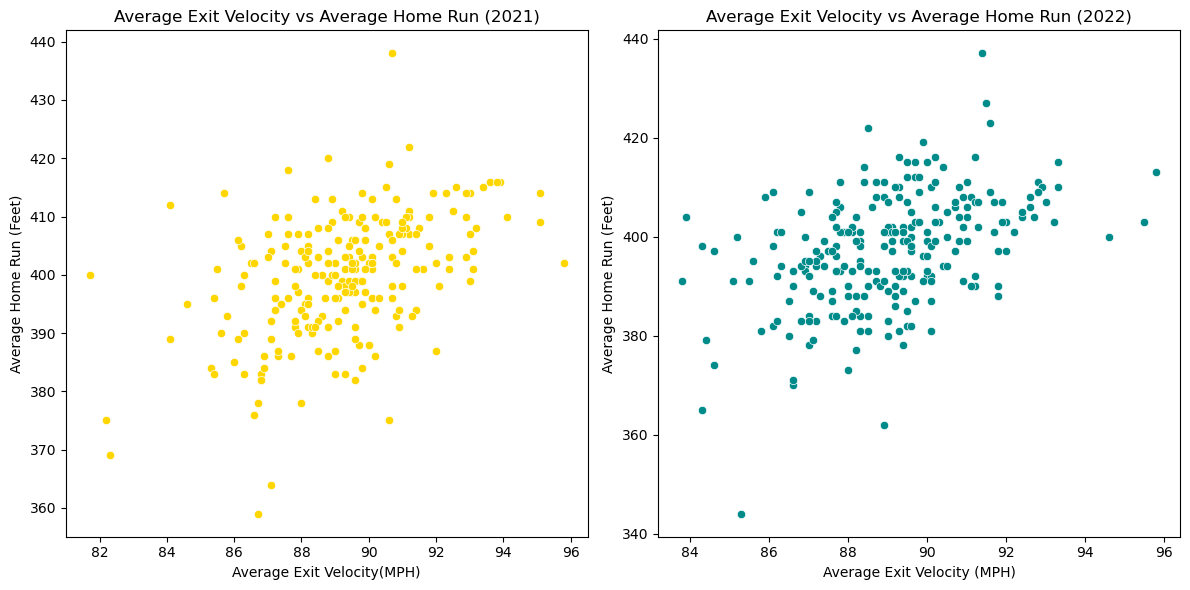

In [172]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=data_2021['average_ev'], y=data_2021['average_homerun'], color = 'gold')
plt.title('Average Exit Velocity vs Average Home Run (2021)')
plt.xlabel('Average Exit Velocity(MPH)')
plt.ylabel('Average Home Run (Feet)')

# Scatter plot for 2022
plt.subplot(1, 2, 2)
sns.scatterplot(x=data_2022['average_ev'], y=data_2022['average_homerun'], color = 'darkcyan')
plt.title('Average Exit Velocity vs Average Home Run (2022)')
plt.xlabel('Average Exit Velocity (MPH)')
plt.ylabel('Average Home Run (Feet)')

plt.tight_layout()
plt.show()

Finally, this model takes the same data from the 2021 and 2022 seasons and focuses on the correlation between average exit velocity and average home run distance. Creating two plots will help show the correlation for the separate seasons. First focusing on the 2021 plot. We see that most of the data points fall between 84 and 94 Mph for average exit velocity and between 380 and 410 feet for average home run distance. Looking at the shape of the data we notice a diagonal shape trending up. This shows that these two features have a positive correlation with the exception of a few outliers so that when average exit velocity rises, the average home run distance is further. Then looking at the 2022 plot most of the data points fall between 86 and 92 Mph for average exit velocity and between 380 and 420 feet for average home run distance. Along with the 2021 model, we see another positive correlation connecting these features by looking at the inclining shape of the plot. Overall, both of these models demonstrate that when average exit velocity increases, we see farther home runs hit.



IMPACT:

Every project produces impacts in its specific field of study. This project mostly has positive impacts. Looking at the different correlations between average exit velocity, launch angle, and average home run distance can help a batter improve what he needs to work on. It also helps coaches see where to put hitters in a lineup. We saw that a higher exit velocity tends to lead to farther home runs. With prior knowledge, I know that baseball managers tend to put their power hitters in the beginning to middle of the order so that the first few people up at bat can get on base, which means that their power hitter can drive in more runs. Ways that this project could improve is that I would like to have had data showing the pitch speed. This could have been valuable because with prior knowledge and physics a faster pitch leads to a higher exit velocity off of the player's bat. Leading off of this I would have liked for the dataset to have provided me with what the type of pitch had been. I could have used this to determine what batter does well with certain pitches and what type of pitches the batter struggles with. Overall this project supports that having a higher exit velocity makes you a far better hitter in Major League Baseball.

REFERENCES:


Mattop. (n.d.). MLB batting exit velocity data (2015–2022). Kaggle. https://www.kaggle.com/datasets/mattop/mlb-batting-exit-velocity-data-2015-2022


Baseball Reference. (n.d.). Baseball statistics and history. Baseball-Reference.com. https://www.baseball-reference.com/


MLB. (n.d.). Exit velocity. MLB.com. https://www.mlb.com/glossary/statcast/exit-velocity











